# Tecnológico de Monterrey

## Maestría en Inteligencia Artificial Aplicada

Avance 1. Análisis exploratorio de datos

In [231]:
# Librerías a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
!pip install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Configura pandas para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [37]:
# Leer el archivo 

archivo_csv = 'Riesgo Suicida Base de datos Jorge.csv'
codificacion = 'Latin1'
datos = pd.read_csv(archivo_csv, encoding=codificacion, sep=';')

print(datos.head())

   Nombre                         Diagnostico  FECHA DE VISITA PRIMERA VEZ   \
0       1  Depresión resistente al tratamiento                    16/1/2016   
1       2  Depresión resistente al tratamiento                    12/1/1998   
2       3  Depresión resistente al tratamiento                     5/8/1997   
3       4  Depresión resistente al tratamiento                     7/7/1998   
4       5  Depresión resistente al tratamiento                   12/10/1998   

  SEXO EDAD FECHA DE NACIMIENTO                   CONDICION ACTUAL  \
0    F   18           23/5/1979  Primera aparición sin antecedente   
1    F   29           30/3/1968  Primera aparición sin antecedente   
2    F   58            6/2/1938          Indistinguible del pasado   
3    M   36           15/3/1962  Primera aparición sin antecedente   
4    F   50           10/2/1948       Recurrencia condición previa   

   NUMERO DE EPISODIOS PREVIOS EDAD DE INICIO DEL PRIMER EPISODIO  \
0                            0     

In [5]:
# Revisar las dimensiones del dataset
datos.shape

(809, 76)

In [6]:
# Muestra la cantidad de valores nulos por columna
nulos_por_columna = datos.isnull().sum()

# Muestra el resultado
print(nulos_por_columna)

Nombre                                                                                                                                                                                         0
Diagnostico                                                                                                                                                                                    0
FECHA DE VISITA PRIMERA VEZ                                                                                                                                                                    0
SEXO                                                                                                                                                                                           0
EDAD                                                                                                                                                                                           0
FECHA DE NACIMIENTO                

In [8]:
proporcion_nulos_por_columna = nulos_por_columna / len(datos)
print(proporcion_nulos_por_columna)

Nombre                                                                                                                                                                                        0.000000
Diagnostico                                                                                                                                                                                   0.000000
FECHA DE VISITA PRIMERA VEZ                                                                                                                                                                   0.000000
SEXO                                                                                                                                                                                          0.000000
EDAD                                                                                                                                                                                          0.000000
FECHA

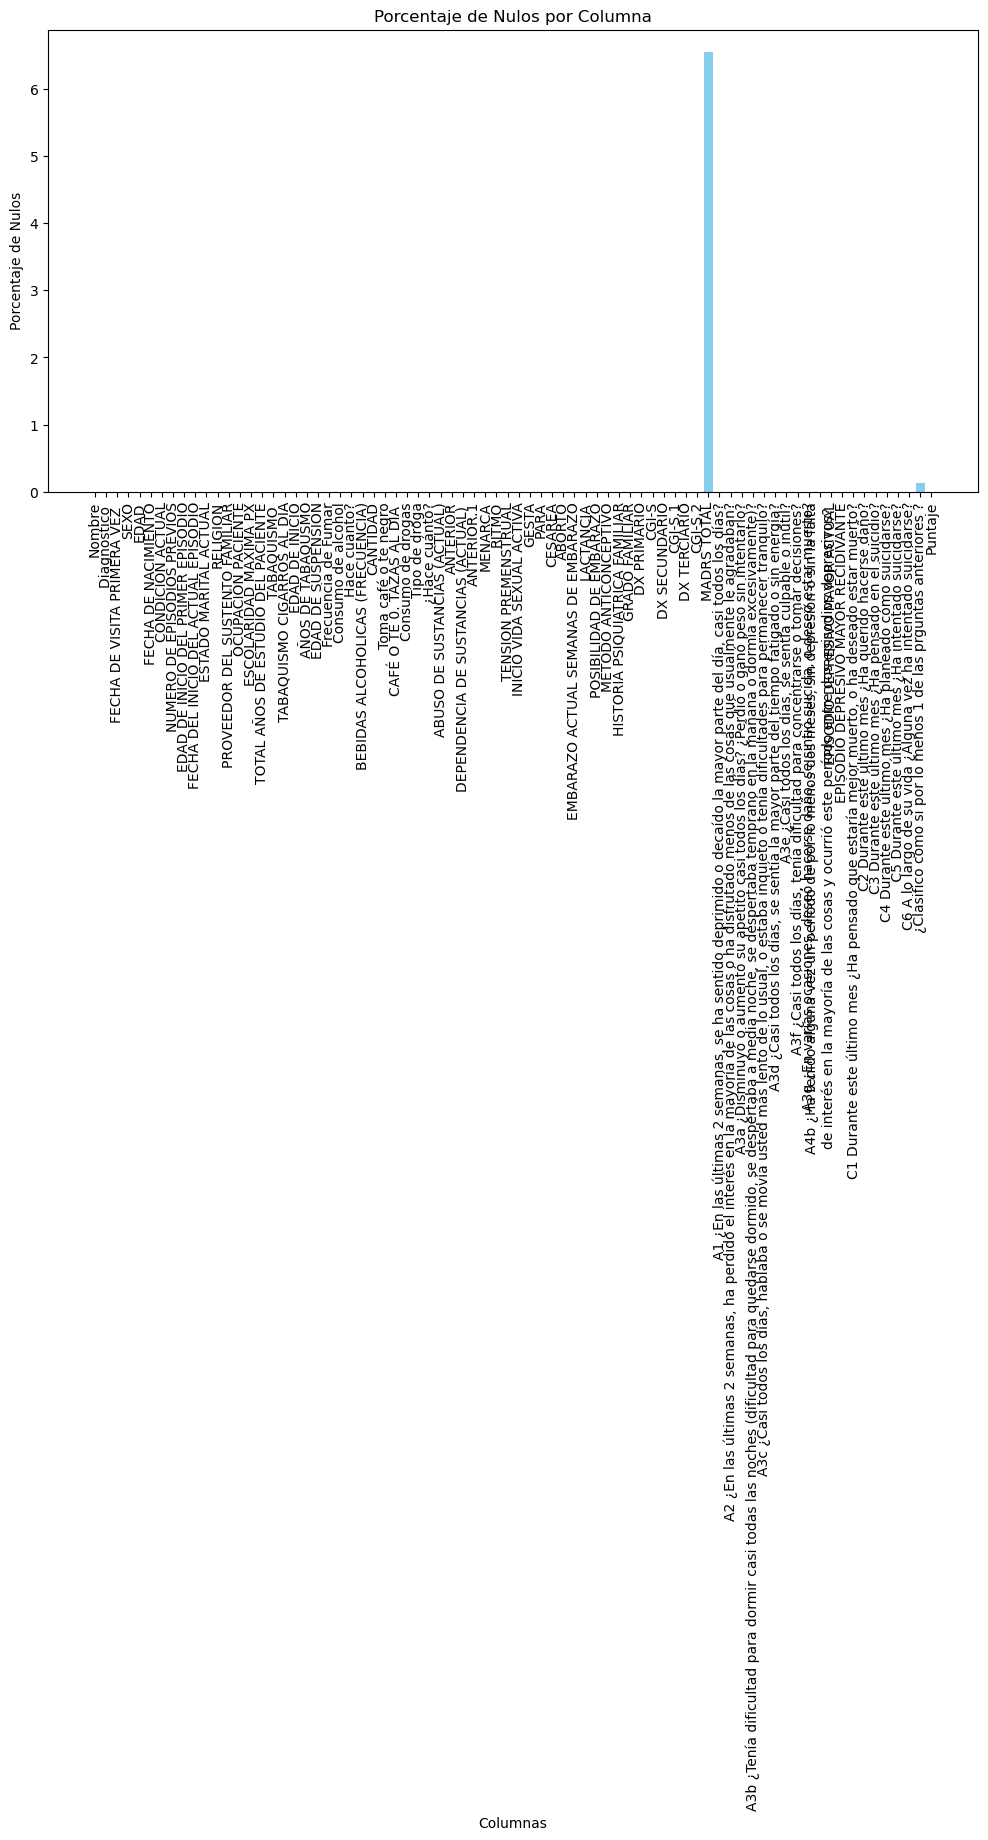

In [9]:
# Configura el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crea un histograma de los porcentajes de valores nulos
plt.bar(proporcion_nulos_por_columna.index, proporcion_nulos_por_columna * 100, color='skyblue')
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Nulos')
plt.title('Porcentaje de Nulos por Columna')

# Rotación de las etiquetas en el eje x para mejorar la legibilidad
plt.xticks(rotation=90)

# Muestra la visualización
plt.show()

In [38]:
datos[datos['MADRS TOTAL'].isnull()].sample(5)

,Nombre,Diagnostico,FECHA DE VISITA PRIMERA VEZ,SEXO,EDAD,FECHA DE NACIMIENTO,CONDICION ACTUAL,NUMERO DE EPISODIOS PREVIOS,EDAD DE INICIO DEL PRIMER EPISODIO,FECHA DEL INICIO DEL ACTUAL EPISODIO,ESTADO MARITAL ACTUAL,RELIGION,PROVEEDOR DEL SUSTENTO FAMILIAR,OCUPACIÓN PACIENTE,ESCOLARIDAD MAXIMA PX,TOTAL AÑOS DE ESTUDIO DEL PACIENTE,TABAQUISMO,TABAQUISMO CIGARROS AL DIA,EDAD DE INICIO,AÑOS DE TABAQUSMO,EDAD DE SUSPENSION,Frecuencia de Fumar,Consumo de alcohol,Hace cuanto?,BEBIDAS ALCOHOLICAS (FRECUENCIA),CANTIDAD,Toma café o te negro,CAFÉ O TÉ 0. TAZAS AL DIA,Consumo de drogas,Tipo de droga,¿Hace cuánto?,ABUSO DE SUSTANCIAS (ACTUAL),ANTERIOR,DEPENDENCIA DE SUSTANCIAS (ACTUAL),ANTERIOR.1,MENARCA,RITMO,TENSION PREMENSTRUAL,INICIO VIDA SEXUAL ACTIVA,GESTA,PARA,CESAREA,ABORTO,EMBARAZO ACTUAL SEMANAS DE EMBARAZO,LACTANCIA,POSIBILIDAD DE EMBARAZO,METODO ANTICONCEPTIVO,HISTORIA PSIQUIATRICA FAMILIAR,GRADO FAMILIAR,DX PRIMARIO,CGI-S,DX SECUNDARIO,CGI-S.1,DX TERCIARIO,CGI-S.2,MADRS TOTAL,"A1 ¿En las últimas 2 semanas, se ha sentido deprimido o decaído la mayor parte del día, casi todos los días?","A2 ¿En las últimas 2 semanas, ha perdido el interés en la mayoría de las cosas o ha disfrutado menos de las cosas que usualmente le agradaban?",A3a ¿Disminuyó o aumentó su apetito casi todos los días? ¿Perdió o ganó peso sin intentarlo?,"A3b ¿Tenía dificultad para dormir casi todas las noches (dificultad para quedarse dormido, se despertaba a media noche, se despertaba temprano en la mañana o dormía excesivamente)?","A3c ¿Casi todos los días, hablaba o se movía usted más lento de lo usual, o estaba inquieto o tenía dificultades para permanecer tranquilo?","A3d ¿Casi todos los días, se sentía la mayor parte del tiempo fatigado o sin energía?","A3e ¿Casi todos los días, se sentía culpable o inútil?","A3f ¿Casi todos los días, tenía dificultad para concentrarse o tomar decisiones?","A3g ¿En varias ocasiones, deseó hacerse daño, se sintió suicida, o deseó estar muerto?","A4b ¿Ha tenido alguna vez un período de por lo menos dos meses, sin depresión o sin la falta\nde interés en la mayoría de las cosas y ocurrió este período entre dos episodios depresivos?",EPISODIO DEPRESIVO MAYOR ACTUAL,EPISODIO DEPRESIVO MAYOR RECIDIVANTE,"C1 Durante este último mes ¿Ha pensado que estaría mejor muerto, o ha deseado estar muerto?",C2 Durante este último mes ¿Ha querido hacerse daño?,C3 Durante este último mes ¿Ha pensado en el suicidio?,C4 Durante este último mes ¿Ha planeado cómo suicidarse?,C5 Durante este último mes ¿Ha intentado suicidarse?,C6 A lo largo de su vida ¿Alguna vez ha intentado suicidarse?,¿Clasifico como si por lo menos 1 de las prguntas anteriores ?,Puntaje
303,304,Depresión resistente al tratamiento,24/8/2005,M,40,4/7/1965,Recurrencia condición previa,2,31,04/2004,Casado(a),Católica,Paciente,No determinado,No determinado,16,No,0,No determinado,0,Negado,No determinado,No,0,No determinado,0,No,0,No,No,0,Negado,Negado,Negado,Negado,No aplica,No aplica,No aplica,17,No aplica,No aplica,No aplica,No aplica,No aplica,No,No,Preservativo,Depresion Mayor,1,Trastorno depresivo mayor recidivante,6,Sin dx secundario,0,Sin dx terciario,0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1.0,7
302,303,Depresión resistente al tratamiento,1/9/2006,M,50,4/7/1950,Recurrencia condición previa,1,48,01/2006,Casado(a),Católica,Paciente,No determinado,No determinado,16,No,0,No determinado,0,Negado,No determinado,No,0,No determinado,0,Si,2,No,No,0,Negado,Negado,Negado,Negado,No aplica,No aplica,No aplica,18,No aplica,No aplica,No aplica,No aplica,No aplica,No,No,Preservativo,Depresion Mayor,1,Trastorno depresivo mayor recidivante,6,Sin dx secundario,0,Sin dx terciario,0,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1.0,7
315,316,Depresión resistente al tratamiento,24/10/2002,M,18,22/10/1984,Primera aparición sin antecedente,0,13,1997,Unión libre,Católica,Paciente,No determinado,No determinado,9,No,0,No determinado,0,Negado,No determinado,No,0,No determinado,0,Si,2,No,No,0,Marihuana.Co

In [39]:
# Se ha tomado la decisión de cambiar todos los nulos de la columna 'MADRS TOTAL' a cero debido a que son 
# aquellos datos que se les pasó por alto colocar el 0
column_name = 'MADRS TOTAL'
datos[column_name] = datos[column_name].fillna(0)

In [12]:
# Muestra la cantidad de valores nulos por columna
nulos_por_columna = datos.isnull().sum()

# Muestra el resultado
print(nulos_por_columna)

Nombre                                                                                                                                                                                        0
Diagnostico                                                                                                                                                                                   0
FECHA DE VISITA PRIMERA VEZ                                                                                                                                                                   0
SEXO                                                                                                                                                                                          0
EDAD                                                                                                                                                                                          0
FECHA DE NACIMIENTO                     

In [8]:
datos[datos['¿Clasifico como si por lo menos 1 de las prguntas anteriores ?'].isnull()].sample(1)

,Nombre,Diagnostico,FECHA DE VISITA PRIMERA VEZ,SEXO,EDAD,FECHA DE NACIMIENTO,CONDICION ACTUAL,NUMERO DE EPISODIOS PREVIOS,EDAD DE INICIO DEL PRIMER EPISODIO,FECHA DEL INICIO DEL ACTUAL EPISODIO,ESTADO MARITAL ACTUAL,RELIGION,PROVEEDOR DEL SUSTENTO FAMILIAR,OCUPACIÓN PACIENTE,ESCOLARIDAD MAXIMA PX,TOTAL AÑOS DE ESTUDIO DEL PACIENTE,TABAQUISMO,TABAQUISMO CIGARROS AL DIA,EDAD DE INICIO,AÑOS DE TABAQUSMO,EDAD DE SUSPENSION,Frecuencia de Fumar,Consumo de alcohol,Hace cuanto?,BEBIDAS ALCOHOLICAS (FRECUENCIA),CANTIDAD,Toma café o te negro,CAFÉ O TÉ 0. TAZAS AL DIA,Consumo de drogas,Tipo de droga,¿Hace cuánto?,ABUSO DE SUSTANCIAS (ACTUAL),ANTERIOR,DEPENDENCIA DE SUSTANCIAS (ACTUAL),ANTERIOR.1,MENARCA,RITMO,TENSION PREMENSTRUAL,INICIO VIDA SEXUAL ACTIVA,GESTA,PARA,CESAREA,ABORTO,EMBARAZO ACTUAL SEMANAS DE EMBARAZO,LACTANCIA,POSIBILIDAD DE EMBARAZO,METODO ANTICONCEPTIVO,HISTORIA PSIQUIATRICA FAMILIAR,GRADO FAMILIAR,DX PRIMARIO,CGI-S,DX SECUNDARIO,CGI-S.1,DX TERCIARIO,CGI-S.2,MADRS TOTAL,"A1 ¿En las últimas 2 semanas, se ha sentido deprimido o decaído la mayor parte del día, casi todos los días?","A2 ¿En las últimas 2 semanas, ha perdido el interés en la mayoría de las cosas o ha disfrutado menos de las cosas que usualmente le agradaban?",A3a ¿Disminuyó o aumentó su apetito casi todos los días? ¿Perdió o ganó peso sin intentarlo?,"A3b ¿Tenía dificultad para dormir casi todas las noches (dificultad para quedarse dormido, se despertaba a media noche, se despertaba temprano en la mañana o dormía excesivamente)?","A3c ¿Casi todos los días, hablaba o se movía usted más lento de lo usual, o estaba inquieto o tenía dificultades para permanecer tranquilo?","A3d ¿Casi todos los días, se sentía la mayor parte del tiempo fatigado o sin energía?","A3e ¿Casi todos los días, se sentía culpable o inútil?","A3f ¿Casi todos los días, tenía dificultad para concentrarse o tomar decisiones?","A3g ¿En varias ocasiones, deseó hacerse daño, se sintió suicida, o deseó estar muerto?","A4b ¿Ha tenido alguna vez un período de por lo menos dos meses, sin depresión o sin la falta\nde interés en la mayoría de las cosas y ocurrió este período entre dos episodios depresivos?",EPISODIO DEPRESIVO MAYOR ACTUAL,EPISODIO DEPRESIVO MAYOR RECIDIVANTE,"C1 Durante este último mes ¿Ha pensado que estaría mejor muerto, o ha deseado estar muerto?",C2 Durante este último mes ¿Ha querido hacerse daño?,C3 Durante este último mes ¿Ha pensado en el suicidio?,C4 Durante este último mes ¿Ha planeado cómo suicidarse?,C5 Durante este último mes ¿Ha intentado suicidarse?,C6 A lo largo de su vida ¿Alguna vez ha intentado suicidarse?,¿Clasifico como si por lo menos 1 de las prguntas anteriores ?,Puntaje
630,631,Trastorno Bipolar,11/2/2017,M,59,1/11/1957,No,0,38,No,Divorciado(a),Católica,Otro,Personal administrativo/Propietario empresa pe...,posgrado,17,No,0,No determinado,0,Negado,No determinado,Si,15 años,Cuatro o más veces por semana,6,No,0,no,No,0,Negado,Negado,Negado,Negado,No aplica,No aplica,No aplica,No determinado,No aplica,No aplica,No aplica,No aplica,No aplica,No,No,Sin uso de metodo anticonceptivo,Trastorno Bipolar,1,TB1 depresivo,5,Sin dx secundario,0,Sin dx terciario,0,26.0,1,1,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,NaN,0


In [40]:
# El unico nulo que existe en la columna '¿Clasifico como si por lo menos 1 de las prguntas anteriores ?' hay que colocarle
# un cero debido a que esta columna identifica si de las preguntas de C1 a C6 tienen alguna respuesta con si
column_name = '¿Clasifico como si por lo menos 1 de las prguntas anteriores ?'
datos[column_name] = datos[column_name].fillna(0)

In [10]:
# Muestra la cantidad de valores nulos por columna
nulos_por_columna = datos.isnull().sum()

# Muestra el resultado
print(nulos_por_columna)

Nombre                                                                                                                                                                                        0
Diagnostico                                                                                                                                                                                   0
FECHA DE VISITA PRIMERA VEZ                                                                                                                                                                   0
SEXO                                                                                                                                                                                          0
EDAD                                                                                                                                                                                          0
FECHA DE NACIMIENTO                     

#### Nota: no tenemos ningún dato nulo

In [16]:
datos.describe()

,Nombre,NUMERO DE EPISODIOS PREVIOS,TOTAL AÑOS DE ESTUDIO DEL PACIENTE,CAFÉ O TÉ 0. TAZAS AL DIA,CGI-S,CGI-S.1,CGI-S.2,MADRS TOTAL,"A1 ¿En las últimas 2 semanas, se ha sentido deprimido o decaído la mayor parte del día, casi todos los días?","A2 ¿En las últimas 2 semanas, ha perdido el interés en la mayoría de las cosas o ha disfrutado menos de las cosas que usualmente le agradaban?",A3a ¿Disminuyó o aumentó su apetito casi todos los días? ¿Perdió o ganó peso sin intentarlo?,"A3b ¿Tenía dificultad para dormir casi todas las noches (dificultad para quedarse dormido, se despertaba a media noche, se despertaba temprano en la mañana o dormía excesivamente)?","A3c ¿Casi todos los días, hablaba o se movía usted más lento de lo usual, o estaba inquieto o tenía dificultades para permanecer tranquilo?","A3d ¿Casi todos los días, se sentía la mayor parte del tiempo fatigado o sin energía?","A3e ¿Casi todos los días, se sentía culpable o inútil?","A3f ¿Casi todos los días, tenía dificultad para concentrarse o tomar decisiones?","A3g ¿En varias ocasiones, deseó hacerse daño, se sintió suicida, o deseó estar muerto?","A4b ¿Ha tenido alguna vez un período de por lo menos dos meses, sin depresión o sin la falta\nde interés en la mayoría de las cosas y ocurrió este período entre dos episodios depresivos?",EPISODIO DEPRESIVO MAYOR ACTUAL,EPISODIO DEPRESIVO MAYOR RECIDIVANTE,"C1 Durante este último mes ¿Ha pensado que estaría mejor muerto, o ha deseado estar muerto?",C2 Durante este último mes ¿Ha querido hacerse daño?,C3 Durante este último mes ¿Ha pensado en el suicidio?,C4 Durante este último mes ¿Ha planeado cómo suicidarse?,C6 A lo largo de su vida ¿Alguna vez ha intentado suicidarse?,¿Clasifico como si por lo menos 1 de las prguntas anteriores ?,Puntaje
count,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.00000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000
mean,405.000000,0.749073,10.182942,0.740420,3.689740,0.148331,0.012361,19.697157,0.777503,0.773795,0.662546,0.758962,0.687268,0.695921,0.714462,0.729295,0.547590,0.73424,0.772559,0.757726,0.674907,0.446230,0.137206,0.116193,0.155748,0.794808,9.405439
std,233.682477,1.445401,4.789753,1.238556,1.913062,0.819170,0.210717,14.685684,0.416180,0.418632,0.473134,0.427978,0.463893,0.460301,0.451950,0.444599,0.753226,0.44201,0.419439,0.495667,0.468699,0.497408,0.344278,0.320654,0.362840,0.404091,9.995978
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,203.000000,0.000000,6.000000,0.000000,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
50%,405.000000,0.000000,10.000000,0.000000,4.000000,0.000000,0.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
75%,607.000000,1.000000,14.000000,1.000000,5.000000,0.000000,0.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,11.000000
max,809.000000,11.000000,25.000000,10.000000,7.000000,7.000000,4.000000,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.00000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000


In [18]:
datos.dtypes

Nombre                                                                                                                                                                                          int64
Diagnostico                                                                                                                                                                                    object
FECHA DE VISITA PRIMERA VEZ                                                                                                                                                                    object
SEXO                                                                                                                                                                                           object
EDAD                                                                                                                                                                                           object
FECHA DE N

In [186]:
# Pasamos el df a otro para trabajar y preprocesarlo
datos_proc = datos.copy()

In [187]:
# Eliminamos la  columna nombre debido a que es un indice que no es un dato del paciente
datos_proc = datos_proc.drop('Nombre', axis=1)

In [43]:
datos_proc.columns

Index(['Diagnostico ', 'FECHA DE VISITA PRIMERA VEZ ', 'SEXO', 'EDAD',
       'FECHA DE NACIMIENTO', 'CONDICION ACTUAL',
       'NUMERO DE EPISODIOS PREVIOS', 'EDAD DE INICIO DEL PRIMER EPISODIO',
       'FECHA DEL INICIO DEL ACTUAL EPISODIO', 'ESTADO MARITAL ACTUAL',
       'RELIGION', 'PROVEEDOR DEL SUSTENTO FAMILIAR', 'OCUPACIÓN PACIENTE',
       'ESCOLARIDAD MAXIMA PX', 'TOTAL AÑOS DE ESTUDIO DEL PACIENTE',
       'TABAQUISMO ', 'TABAQUISMO CIGARROS AL DIA', 'EDAD DE INICIO',
       'AÑOS DE TABAQUSMO', 'EDAD DE SUSPENSION', 'Frecuencia de Fumar',
       'Consumo de alcohol', 'Hace cuanto?',
       'BEBIDAS ALCOHOLICAS (FRECUENCIA)', 'CANTIDAD', 'Toma café o te negro',
       'CAFÉ O TÉ 0. TAZAS AL DIA ', 'Consumo de drogas', 'Tipo de droga',
       '¿Hace cuánto?', 'ABUSO DE SUSTANCIAS (ACTUAL)', 'ANTERIOR',
       'DEPENDENCIA DE SUSTANCIAS (ACTUAL) ', 'ANTERIOR.1', 'MENARCA', 'RITMO',
       'TENSION PREMENSTRUAL', 'INICIO VIDA SEXUAL ACTIVA', 'GESTA', 'PARA',
       'CESAREA', 

In [188]:
# Renombraremos las columnas para mejor tratamiento
nuevos_nombres = {'FECHA DE VISITA PRIMERA VEZ ': 'fecha_1',
                  'FECHA DE NACIMIENTO': 'fecha_nac',
                  'CONDICION ACTUAL': 'condicion',
                  'ESTADO MARITAL ACTUAL': 'estado_civil',
                  'OCUPACIÓN PACIENTE': 'ocupacion',
                  'ESCOLARIDAD MAXIMA PX': 'escolaridad',
                  'TOTAL AÑOS DE ESTUDIO DEL PACIENTE': 'años_estudio',
                  'A1 ¿En las últimas 2 semanas, se ha sentido deprimido o decaído la mayor parte del día, casi todos los días?': 'A1',
                  'A2 ¿En las últimas 2 semanas, ha perdido el interés en la mayoría de las cosas o ha disfrutado menos de las cosas que usualmente le agradaban?': 'A2',
                  'A3a ¿Disminuyó o aumentó su apetito casi todos los días? ¿Perdió o ganó peso sin intentarlo?': 'A3a',
       'A3b ¿Tenía dificultad para dormir casi todas las noches (dificultad para quedarse dormido, se despertaba a media noche, se despertaba temprano en la mañana o dormía excesivamente)?': 'A3b',
       'A3c ¿Casi todos los días, hablaba o se movía usted más lento de lo usual, o estaba inquieto o tenía dificultades para permanecer tranquilo?' : 'A3c',
       'A3d ¿Casi todos los días, se sentía la mayor parte del tiempo fatigado o sin energía?' : 'A3d',
       'A3e ¿Casi todos los días, se sentía culpable o inútil?': 'A3e',
       'A3f ¿Casi todos los días, tenía dificultad para concentrarse o tomar decisiones?' : 'A3f',
       'A3g ¿En varias ocasiones, deseó hacerse daño, se sintió suicida, o deseó estar muerto?' : 'A3g',
       'A4b ¿Ha tenido alguna vez un período de por lo menos dos meses, sin depresión o sin la falta\nde interés en la mayoría de las cosas y ocurrió este período entre dos episodios depresivos?':'A4b',
       'EPISODIO DEPRESIVO MAYOR ACTUAL' : 'EDMA',
       'EPISODIO DEPRESIVO MAYOR RECIDIVANTE' : 'EDMR',
       'C1 Durante este último mes ¿Ha pensado que estaría mejor muerto, o ha deseado estar muerto?' : 'C1',
       'C2 Durante este último mes ¿Ha querido hacerse daño?': 'C2',
       'C3 Durante este último mes ¿Ha pensado en el suicidio?' : 'C3',
       'C4 Durante este último mes ¿Ha planeado cómo suicidarse?' : 'C4',
       ' C5 Durante este último mes ¿Ha intentado suicidarse?' : 'C5',
       'C6 A lo largo de su vida ¿Alguna vez ha intentado suicidarse?': 'C6',
       '¿Clasifico como si por lo menos 1 de las prguntas anteriores ?' : 'hay_c'}

datos_proc = datos_proc.rename(columns=nuevos_nombres)

In [24]:
datos_proc.columns

Index(['Diagnostico ', 'fecha_1', 'SEXO', 'EDAD', 'fecha_nac', 'condicion',
       'NUMERO DE EPISODIOS PREVIOS', 'EDAD DE INICIO DEL PRIMER EPISODIO',
       'FECHA DEL INICIO DEL ACTUAL EPISODIO', 'estado_civil', 'RELIGION',
       'PROVEEDOR DEL SUSTENTO FAMILIAR', 'ocupacion', 'escolaridad',
       'años_estudio', 'TABAQUISMO ', 'TABAQUISMO CIGARROS AL DIA',
       'EDAD DE INICIO', 'AÑOS DE TABAQUSMO', 'EDAD DE SUSPENSION',
       'Frecuencia de Fumar', 'Consumo de alcohol', 'Hace cuanto?',
       'BEBIDAS ALCOHOLICAS (FRECUENCIA)', 'CANTIDAD', 'Toma café o te negro',
       'CAFÉ O TÉ 0. TAZAS AL DIA ', 'Consumo de drogas', 'Tipo de droga',
       '¿Hace cuánto?', 'ABUSO DE SUSTANCIAS (ACTUAL)', 'ANTERIOR',
       'DEPENDENCIA DE SUSTANCIAS (ACTUAL) ', 'ANTERIOR.1', 'MENARCA', 'RITMO',
       'TENSION PREMENSTRUAL', 'INICIO VIDA SEXUAL ACTIVA', 'GESTA', 'PARA',
       'CESAREA', 'ABORTO', 'EMBARAZO ACTUAL SEMANAS DE EMBARAZO', 'LACTANCIA',
       'POSIBILIDAD DE EMBARAZO', 'METOD

In [67]:
datos_proc.dtypes

EDAD                                               float64
fecha_nac                                           object
condicion                                           object
NUMERO DE EPISODIOS PREVIOS                          int64
EDAD DE INICIO DEL PRIMER EPISODIO                  object
FECHA DEL INICIO DEL ACTUAL EPISODIO                object
estado_civil                                        object
RELIGION                                            object
PROVEEDOR DEL SUSTENTO FAMILIAR                     object
ocupacion                                           object
escolaridad                                         object
años_estudio                                         int64
TABAQUISMO                                          object
TABAQUISMO CIGARROS AL DIA                          object
AÑOS DE TABAQUSMO                                   object
Consumo de alcohol                                  object
Hace cuanto?                                        obje

In [189]:
# Eliminamos algunas columnas debido a que hay muchos pacientes que no proporcionaron esta información y no se puede hacer
# una imputacion debido a que falta mucha información y puede deteriorar la calidad del df
columnas_a_eliminar = ['fecha_1','EDAD DE INICIO', 'EDAD DE SUSPENSION', 'Frecuencia de Fumar','BEBIDAS ALCOHOLICAS (FRECUENCIA)',
                      'Tipo de droga', 'ABUSO DE SUSTANCIAS (ACTUAL)','ANTERIOR','DEPENDENCIA DE SUSTANCIAS (ACTUAL) ',
                      'ANTERIOR.1', 'POSIBILIDAD DE EMBARAZO']

datos_proc = datos_proc.drop(columns=columnas_a_eliminar)

In [133]:
datos_proc.shape

(809, 64)

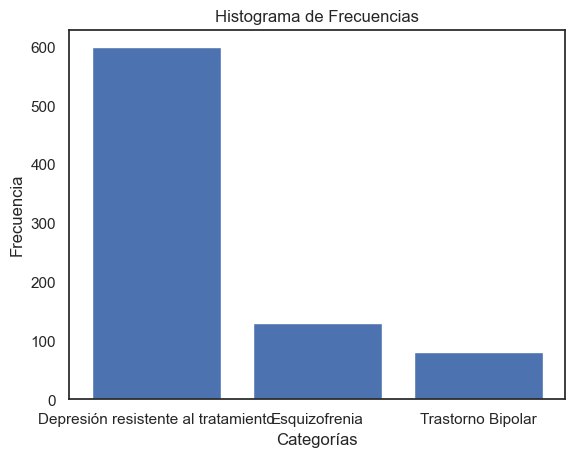

In [190]:
# Contar frecuencias
frecuencias = datos_proc['Diagnostico '].value_counts()

# Crear un histograma
plt.bar(frecuencias.index, frecuencias.values)

# Añadir etiquetas y título
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencias')

# Mostrar el histograma
plt.show()

In [191]:
# Utiliza get_dummies para crear variables ficticias
df_dummies = pd.get_dummies(datos_proc['Diagnostico '], prefix='Diagnostico')

df_dummies = df_dummies.astype(int)

# Concatena las variables ficticias al DataFrame original
datos_proc = pd.concat([datos_proc, df_dummies], axis=1)

datos_proc = datos_proc.drop('Diagnostico ', axis=1)

In [97]:
datos_proc.sample(3)

,EDAD,NUMERO DE EPISODIOS PREVIOS,RELIGION,PROVEEDOR DEL SUSTENTO FAMILIAR,ocupacion,escolaridad,años_estudio,TABAQUISMO,TABAQUISMO CIGARROS AL DIA,AÑOS DE TABAQUSMO,Consumo de alcohol,Hace cuanto?,CANTIDAD,Toma café o te negro,CAFÉ O TÉ 0. TAZAS AL DIA,Consumo de drogas,¿Hace cuánto?,MENARCA,RITMO,TENSION PREMENSTRUAL,INICIO VIDA SEXUAL ACTIVA,GESTA,PARA,CESAREA,ABORTO,EMBARAZO ACTUAL SEMANAS DE EMBARAZO,LACTANCIA,METODO ANTICONCEPTIVO,HISTORIA PSIQUIATRICA FAMILIAR,GRADO FAMILIAR,DX PRIMARIO,CGI-S,DX SECUNDARIO,CGI-S.1,DX TERCIARIO,CGI-S.2,MADRS TOTAL,A1,A2,A3a,A3b,A3c,A3d,A3e,A3f,A3g,A4b,EDMA,EDMR,C1,C2,C3,C4,C5,C6,hay_c,Puntaje,Diagnostico_Depresión resistente al tratamiento,Diagnostico_Esquizofrenia,Diagnostico_Trastorno Bipolar,F,condicion_dummy,Pareja
552,51.0,0,Católica,Paciente,No determinado,Menos de 6 años,5,Si,15,38,No,0,0,No,0,No,0,9,Histerectomía/Menopausia,Nada,14,11,8,0,3,0,No,Sin uso de metodo anticonceptivo,0,0,Trastorno depresivo mayor recidivante,1,Sin dx secundario,0,Sin dx terciario,0,3.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1.0,3,1,0,0,1,1,1
120,62.0,2,Católica,Paciente,Dependiente/Desempleado,Licenciatura,16,No,0,0,No,0,0,No,0,No,0,No aplica,No aplica,No aplica,No determinado,No aplica,No aplica,No aplica,No aplica,No aplica,No,Vasectomía,Depresion Mayor ...,1,Trastorno depresivo mayor recidivante,5,Trastorno de ansiedad generalizada,4,Sin dx terciario,0,31.0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1.0,7,1,0,0,0,1,1
244,43.0,0,Católica,Otro,Dependiente/Desempleado,Menos de 6 años,6,No,0,0,No,0,0,No,0,No,0,12,Irregular,Nada,18,0,0,0,0,0,No,Preservativo,0,0,Trastorno depresivo episodio único,3,Sin dx secundario,0,Sin dx terciario,0,29.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1.0,3,1,0,0,1,1,1


In [192]:
datos_proc['F'] = datos_proc['SEXO'].str.upper().eq('F').astype(int)

In [193]:
datos_proc = datos_proc.drop('SEXO', axis=1)

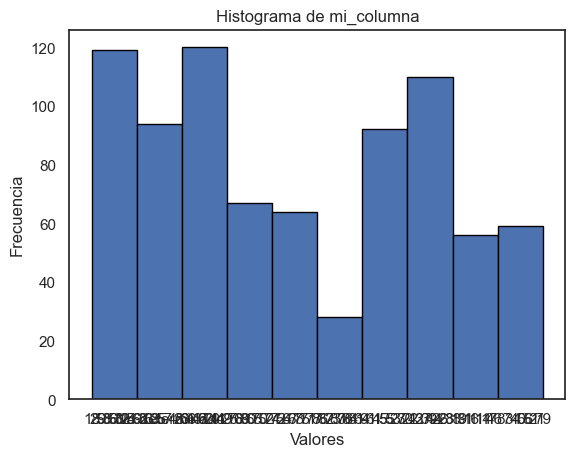

In [194]:
# Crea un histograma
plt.hist(datos_proc['EDAD'], bins=10, edgecolor='black')

# Añade etiquetas y título
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Histograma de mi_columna')

# Muestra el histograma
plt.show()

In [195]:
filtro_no_numerico = ~datos_proc['EDAD'].str.isnumeric()

# Filtra el DataFrame
resultados = datos_proc[filtro_no_numerico][['EDAD', 'fecha_nac']]

# Muestra los resultados
print(resultados)

               EDAD  fecha_nac
17   No determinado         No
18   No determinado  19/9/1971
386  No determinado         No
689  No determinado         No
702  No determinado         No
713  No determinado   4/6/1952
764  No determinado         No
765  No determinado         No


In [196]:
#mputar 'No determinado' con la diferencia entre el año actual y el año de fecha_nac
datos_proc.loc[datos_proc['EDAD'] == 'No determinado', 'EDAD'] = (
    2024 - pd.to_datetime(datos_proc['fecha_nac'], errors='coerce').dt.year
)

#Calcular el promedio de edades (excluyendo los 'No determinado')
promedio_edades = pd.to_numeric(datos_proc[datos_proc['EDAD'] != 'No determinado']['EDAD'], errors='coerce').mean()

# Imputar el promedio de edades a los registros con 'No determinado' en la columna 'EDAD'
datos_proc.loc[datos_proc['EDAD'] == 'No determinado', 'EDAD'] = promedio_edades

# Convertir la columna 'EDAD' a tipo numérico
datos_proc['EDAD'] = pd.to_numeric(datos_proc['EDAD'], errors='coerce')

C:\Users\jabermudezt\AppData\Local\Temp\ipykernel_11712\3928465458.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  2024 - pd.to_datetime(datos_proc['fecha_nac'], errors='coerce').dt.year


In [197]:
datos_proc = datos_proc.drop('fecha_nac', axis=1)

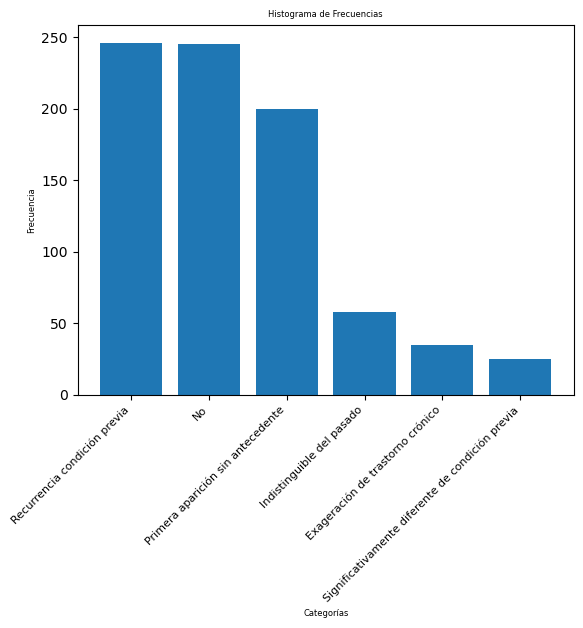

In [89]:
frecuencias = datos_proc['condicion'].value_counts()

# Crear un histograma
plt.bar(frecuencias.index, frecuencias.values)

# Añadir etiquetas y título con tamaños de fuente personalizados
plt.xlabel('Categorías', fontsize=6)
plt.ylabel('Frecuencia', fontsize=6)
plt.title('Histograma de Frecuencias', fontsize=6)

plt.xticks(rotation=45, ha='right', fontsize=8)

# Mostrar el histograma
plt.show()

In [198]:
datos_proc['condicion_dummy'] = datos_proc['condicion'].apply(lambda x: 0 if x.lower() == 'no' else 1).astype(int)

datos_proc.drop('condicion', axis=1, inplace=True)

In [199]:
# Eliminamos algunas columnas debido a que hay muchos pacientes que no proporcionaron esta información y no se puede hacer
# una imputacion debido a que falta mucha información y puede deteriorar la calidad del df
columnas_a_eliminar = ['EDAD DE INICIO DEL PRIMER EPISODIO','FECHA DEL INICIO DEL ACTUAL EPISODIO']

datos_proc = datos_proc.drop(columns=columnas_a_eliminar)

In [200]:
datos_proc.shape

(809, 63)

In [201]:
datos_proc['Pareja'] = datos_proc['estado_civil'].apply(lambda x: 1 if x in ['Casado(a)', 'Unión libre'] else 0).astype(int)

datos_proc.drop('estado_civil', axis=1, inplace=True)

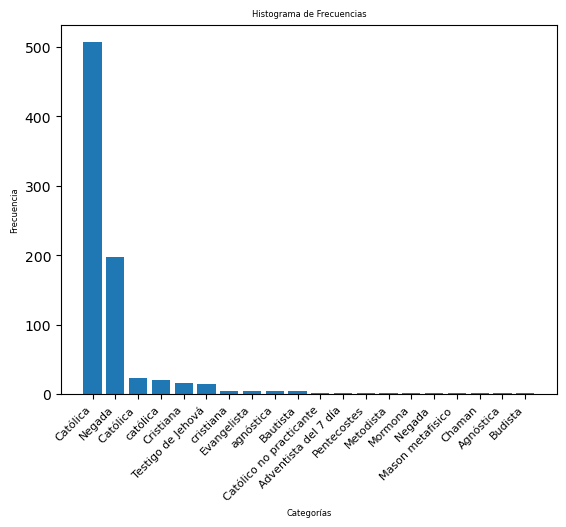

In [98]:
frecuencias = datos_proc['RELIGION'].value_counts()

# Crear un histograma
plt.bar(frecuencias.index, frecuencias.values)

# Añadir etiquetas y título con tamaños de fuente personalizados
plt.xlabel('Categorías', fontsize=6)
plt.ylabel('Frecuencia', fontsize=6)
plt.title('Histograma de Frecuencias', fontsize=6)

plt.xticks(rotation=45, ha='right', fontsize=8)

# Mostrar el histograma
plt.show()

In [202]:
datos_proc['catolica'] = datos_proc['RELIGION'].apply(lambda x: 1 if str(x).lower().startswith('ca') else 0).astype(int)

datos_proc.drop('RELIGION', axis=1, inplace=True)

In [124]:
datos_proc.sample(3)

,EDAD,NUMERO DE EPISODIOS PREVIOS,años_estudio,TABAQUISMO,TABAQUISMO CIGARROS AL DIA,AÑOS DE TABAQUSMO,Consumo de alcohol,Hace cuanto?,CANTIDAD,CAFÉ O TÉ 0. TAZAS AL DIA,¿Hace cuánto?,MENARCA,RITMO,TENSION PREMENSTRUAL,INICIO VIDA SEXUAL ACTIVA,GESTA,PARA,CESAREA,ABORTO,EMBARAZO ACTUAL SEMANAS DE EMBARAZO,LACTANCIA,METODO ANTICONCEPTIVO,HISTORIA PSIQUIATRICA FAMILIAR,GRADO FAMILIAR,DX PRIMARIO,CGI-S,DX SECUNDARIO,CGI-S.1,DX TERCIARIO,CGI-S.2,MADRS TOTAL,A1,A2,A3a,A3b,A3c,A3d,A3e,A3f,A3g,A4b,EDMA,EDMR,C1,C2,C3,C4,C5,C6,hay_c,Puntaje,Diagnostico_Depresión resistente al tratamiento,Diagnostico_Esquizofrenia,Diagnostico_Trastorno Bipolar,F,condicion_dummy,Pareja,catolica,proveedor,cafe,drogas
644,40.0,0,9,1,10,0,0,0,0,0,17,No determinado,No determinado,Nada,No determinado,0,0,0,0,0,No,Sin uso de metodo anticonceptivo,Depresión,"1,",TB2,5,Sin dx secundario,0,Sin dx terciario,0,40.0,1,1,1,1,0,0,1,1,1,0,1,0,1,1,1,0,1,1,1.0,23,0,0,1,1,0,1,0,0,0,0
85,86.0,0,6,0,0,0,0,0,0,0,0,10,Histerectomía/Menopausia,Nada,22,9,9,0,0,0,No,Sin uso de metodo anticonceptivo,0,0,Trastorno depresivo episodio único,6,Sin dx secundario,0,Sin dx terciario,0,1.0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1.0,3,1,0,0,1,1,0,1,1,0,0
241,63.0,0,12,0,0,0,0,0,0,0,0,14,Histerectomía/Menopausia,Nada,30,7,5,0,2,0,No,Preservativo,0,0,Trastorno depresivo episodio único,5,Sin dx secundario,0,Sin dx terciario,0,0.0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1.0,7,1,0,0,1,1,1,1,1,0,0


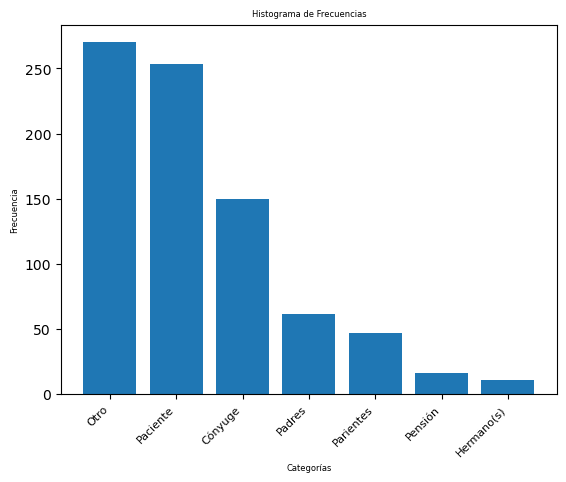

In [143]:
frecuencias = datos_proc['PROVEEDOR DEL SUSTENTO FAMILIAR'].value_counts()

# Crear un histograma
plt.bar(frecuencias.index, frecuencias.values)

# Añadir etiquetas y título con tamaños de fuente personalizados
plt.xlabel('Categorías', fontsize=6)
plt.ylabel('Frecuencia', fontsize=6)
plt.title('Histograma de Frecuencias', fontsize=6)

plt.xticks(rotation=45, ha='right', fontsize=8)

# Mostrar el histograma
plt.show()

In [203]:
datos_proc['proveedor'] = datos_proc['PROVEEDOR DEL SUSTENTO FAMILIAR'].apply(lambda x: 1 if str(x).lower() == 'paciente' else 0).astype(int)

datos_proc.drop('PROVEEDOR DEL SUSTENTO FAMILIAR', axis=1, inplace=True)

In [204]:
# Eliminamos algunas columnas debido a que hay muchos pacientes que no proporcionaron esta información y no se puede hacer
# una imputacion debido a que falta mucha información y puede deteriorar la calidad del df
columnas_a_eliminar = ['ocupacion','escolaridad']

datos_proc = datos_proc.drop(columns=columnas_a_eliminar)

In [205]:
datos_proc['TABAQUISMO '] = datos_proc['TABAQUISMO '].str.strip().replace({'No': 0, 'Si': 1}).astype(int)

C:\Users\jabermudezt\AppData\Local\Temp\ipykernel_11712\1027243432.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_proc['TABAQUISMO '] = datos_proc['TABAQUISMO '].str.strip().replace({'No': 0, 'Si': 1}).astype(int)


In [206]:
datos_proc['Consumo de alcohol'] = datos_proc['Consumo de alcohol'].str.strip().str.lower().replace({'no': 0, 'si': 1}).astype(int)


C:\Users\jabermudezt\AppData\Local\Temp\ipykernel_11712\513667594.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_proc['Consumo de alcohol'] = datos_proc['Consumo de alcohol'].str.strip().str.lower().replace({'no': 0, 'si': 1}).astype(int)


In [207]:
datos_proc['Hace cuanto?'] = pd.to_numeric(datos_proc['Hace cuanto?'].str.extract('(\d+)', expand=False), errors='coerce').astype(int)

In [208]:
datos_proc['CANTIDAD'] = pd.to_numeric(datos_proc['CANTIDAD'].str.extract('(\d+)', expand=False), errors='coerce').astype(int)

In [209]:
datos_proc['cafe'] = datos_proc['Toma café o te negro'].apply(lambda x: 0 if x.lower() == 'no' else 1).astype(int)

datos_proc.drop('Toma café o te negro', axis=1, inplace=True)

In [210]:
datos_proc['drogas'] = datos_proc['Consumo de drogas'].apply(lambda x: 0 if x.lower() == 'no' else 1).astype(int)

datos_proc.drop('Consumo de drogas', axis=1, inplace=True)

In [211]:
datos_proc['¿Hace cuánto?'] = pd.to_numeric(datos_proc['¿Hace cuánto?'].str.extract('(\d+)', expand=False), errors='coerce').astype(int)

In [212]:
# Eliminamos algunas columnas debido a que hay muchos pacientes que no proporcionaron esta información y no se puede hacer
# una imputacion debido a que falta mucha información y puede deteriorar la calidad del df
columnas_a_eliminar = ['MENARCA', 'RITMO',
       'TENSION PREMENSTRUAL', 'INICIO VIDA SEXUAL ACTIVA', 'GESTA', 'PARA',
       'CESAREA', 'ABORTO', 'EMBARAZO ACTUAL SEMANAS DE EMBARAZO', 'LACTANCIA',
        'METODO ANTICONCEPTIVO']

datos_proc = datos_proc.drop(columns=columnas_a_eliminar)

In [213]:
datos_proc.shape

(809, 50)

In [156]:
datos_proc.sample(1)

,EDAD,fecha_nac,NUMERO DE EPISODIOS PREVIOS,años_estudio,TABAQUISMO,TABAQUISMO CIGARROS AL DIA,AÑOS DE TABAQUSMO,Consumo de alcohol,Hace cuanto?,CANTIDAD,CAFÉ O TÉ 0. TAZAS AL DIA,¿Hace cuánto?,HISTORIA PSIQUIATRICA FAMILIAR,GRADO FAMILIAR,DX PRIMARIO,CGI-S,DX SECUNDARIO,CGI-S.1,DX TERCIARIO,CGI-S.2,MADRS TOTAL,A1,A2,A3a,A3b,A3c,A3d,A3e,A3f,A3g,A4b,EDMA,EDMR,C1,C2,C3,C4,C5,C6,hay_c,Puntaje,Diagnostico_Depresión resistente al tratamiento,Diagnostico_Esquizofrenia,Diagnostico_Trastorno Bipolar,F,condicion_dummy,Pareja,catolica,proveedor,cafe,drogas
211,39.0,8/2/1900,1,17,0,0,0,0,0,0,0,0,0,0,Trastorno depresivo mayor recidivante,5,Sin dx secundario,0,Sin dx terciario,0,13.0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1.0,7,1,0,0,1,1,1,1,0,0,0


In [214]:
datos_proc['historia'] = datos_proc['HISTORIA PSIQUIATRICA FAMILIAR'].apply(lambda x: 0 if x.lower() == 0 else 1).astype(int)

datos_proc.drop('HISTORIA PSIQUIATRICA FAMILIAR', axis=1, inplace=True)

In [215]:
# Eliminamos algunas columnas debido a que hay muchos pacientes que no proporcionaron esta información y no se puede hacer
# una imputacion debido a que falta mucha información y puede deteriorar la calidad del df
columnas_a_eliminar = ['GRADO FAMILIAR', 'DX PRIMARIO',
       'DX SECUNDARIO', 'DX TERCIARIO']

datos_proc = datos_proc.drop(columns=columnas_a_eliminar)

In [160]:
datos_proc.shape

(809, 47)

In [169]:
datos_proc.dtypes

EDAD                                               float64
NUMERO DE EPISODIOS PREVIOS                          int64
años_estudio                                         int64
TABAQUISMO                                           int32
TABAQUISMO CIGARROS AL DIA                         float64
AÑOS DE TABAQUSMO                                  float64
Consumo de alcohol                                   int32
Hace cuanto?                                         int32
CANTIDAD                                             int32
CAFÉ O TÉ 0. TAZAS AL DIA                            int64
¿Hace cuánto?                                        int32
CGI-S                                                int64
CGI-S.1                                              int64
CGI-S.2                                              int64
MADRS TOTAL                                        float64
A1                                                   int64
A2                                                   int

In [217]:
datos_proc['TABAQUISMO CIGARROS AL DIA'] = pd.to_numeric(datos_proc['TABAQUISMO CIGARROS AL DIA'].str.replace(',', '.'), errors='coerce')

In [218]:
datos_proc['AÑOS DE TABAQUSMO'] = pd.to_numeric(datos_proc['AÑOS DE TABAQUSMO'].str.replace(',', '.'), errors='coerce')

In [219]:
datos_proc['C5'] = datos_proc['C5'].apply(lambda x: 0 if x.lower() == 0 else 1).astype(int)

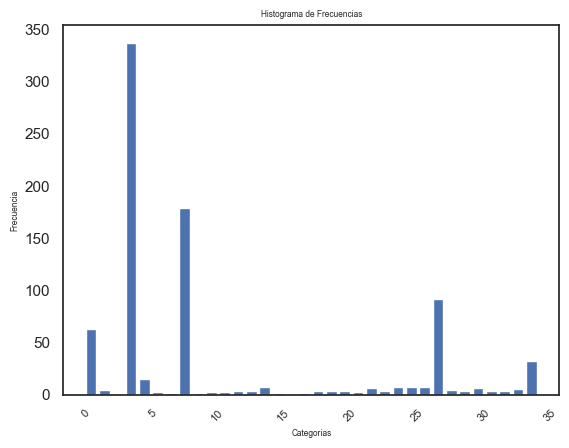

In [220]:
frecuencias = datos_proc['Puntaje'].value_counts()

# Crear un histograma
plt.bar(frecuencias.index, frecuencias.values)

# Añadir etiquetas y título con tamaños de fuente personalizados
plt.xlabel('Categorías', fontsize=6)
plt.ylabel('Frecuencia', fontsize=6)
plt.title('Histograma de Frecuencias', fontsize=6)

plt.xticks(rotation=45, ha='right', fontsize=8)

# Mostrar el histograma
plt.show()

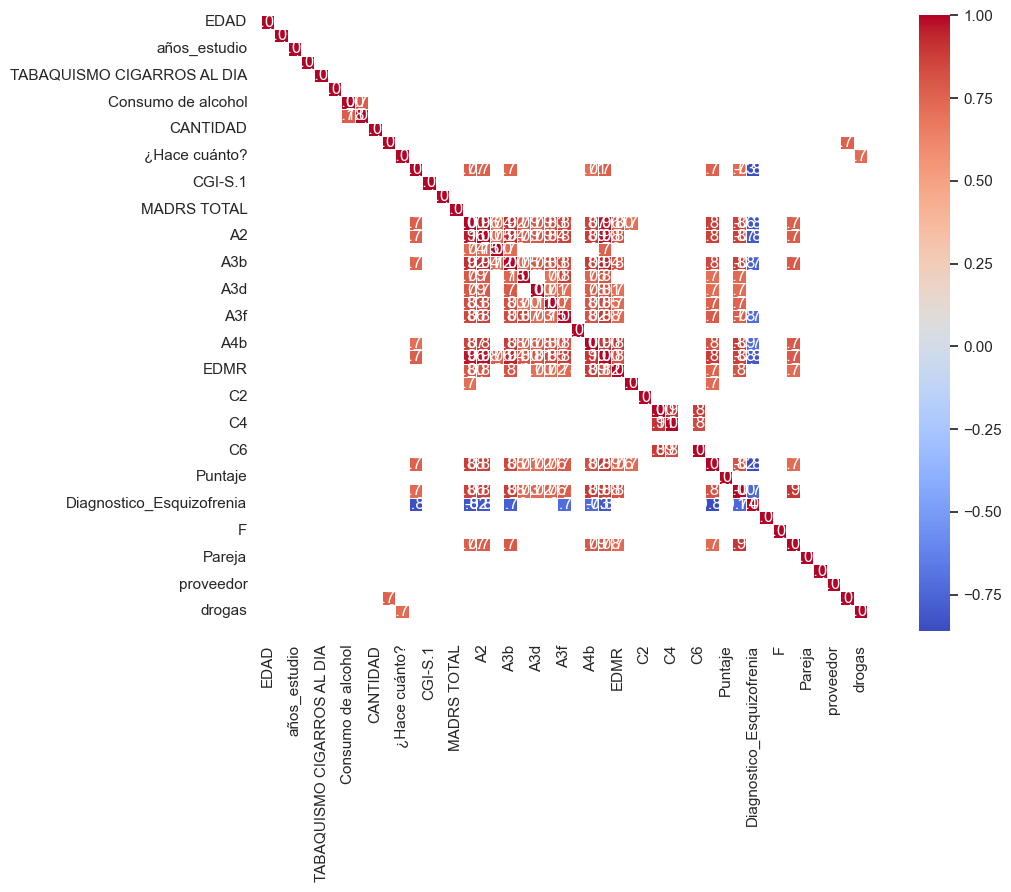

In [221]:
# Supongamos que tu DataFrame se llama datos
matriz_correlacion = datos_proc.corr()

# Filtra la matriz para mostrar solo correlaciones mayores a 0.7 o menores a -0.7
umbral = 0.7
matriz_filtrada = matriz_correlacion[(matriz_correlacion > umbral) | (matriz_correlacion < -umbral)]

# Configura el estilo de seaborn para mejorar la estética del mapa de calor
sns.set(style="white")

# Crea un mapa de calor con las correlaciones filtradas
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_filtrada, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Muestra el mapa de calor
plt.show()

In [177]:
datos_proc.shape

(809, 46)

In [175]:
datos_proc.sample(1)

,EDAD,NUMERO DE EPISODIOS PREVIOS,años_estudio,TABAQUISMO,TABAQUISMO CIGARROS AL DIA,AÑOS DE TABAQUSMO,Consumo de alcohol,Hace cuanto?,CANTIDAD,CAFÉ O TÉ 0. TAZAS AL DIA,¿Hace cuánto?,CGI-S,CGI-S.1,CGI-S.2,MADRS TOTAL,A1,A2,A3a,A3b,A3c,A3d,A3e,A3f,A3g,A4b,EDMA,EDMR,C1,C2,C3,C4,C5,C6,hay_c,Puntaje,Diagnostico_Depresión resistente al tratamiento,Diagnostico_Esquizofrenia,Diagnostico_Trastorno Bipolar,F,condicion_dummy,Pareja,catolica,proveedor,cafe,drogas,historia
129,53.0,1,9,0,0.0,0.0,0,0,0,0,0,4,0,0,30.0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1.0,7,1,0,0,0,1,1,1,1,0,0,1


## Normalización

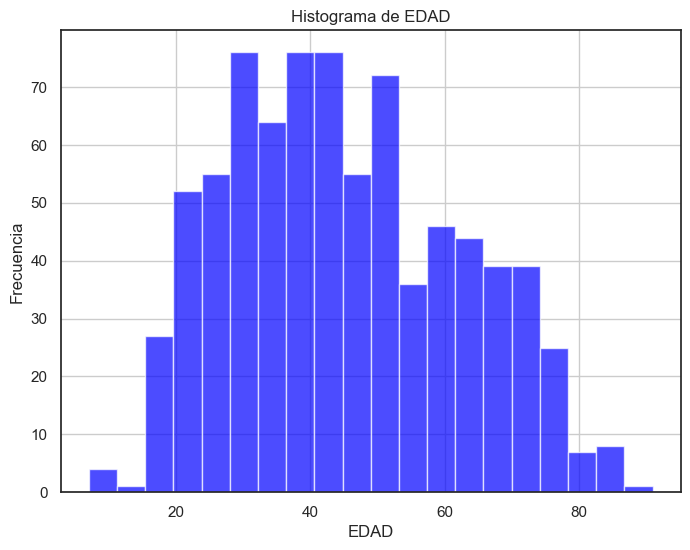

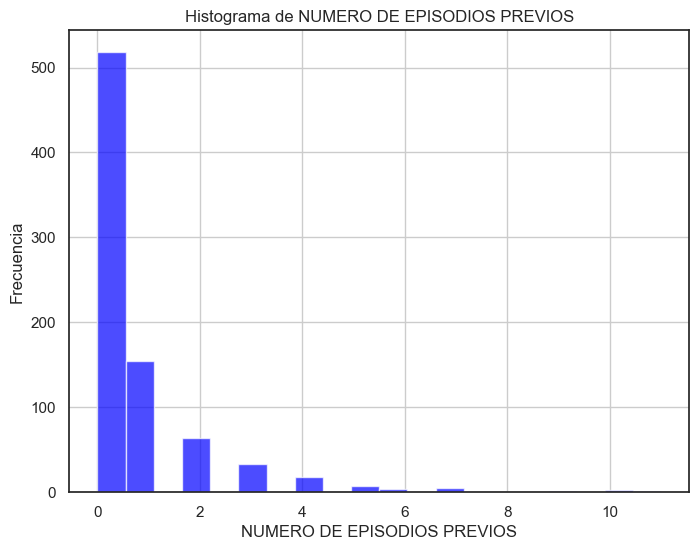

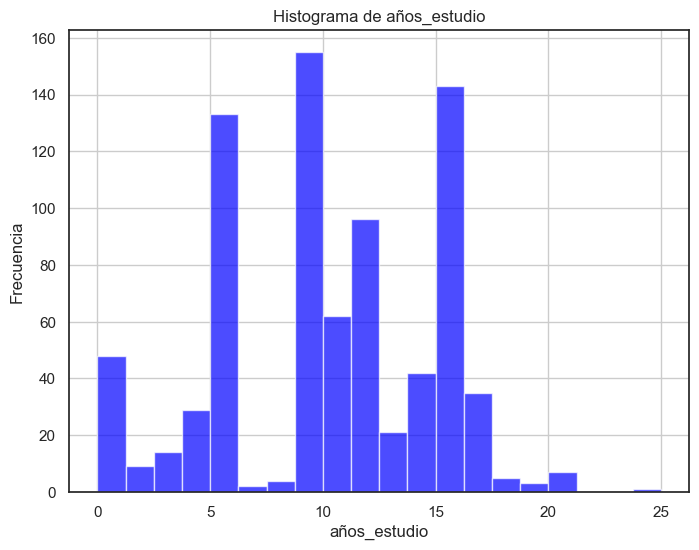

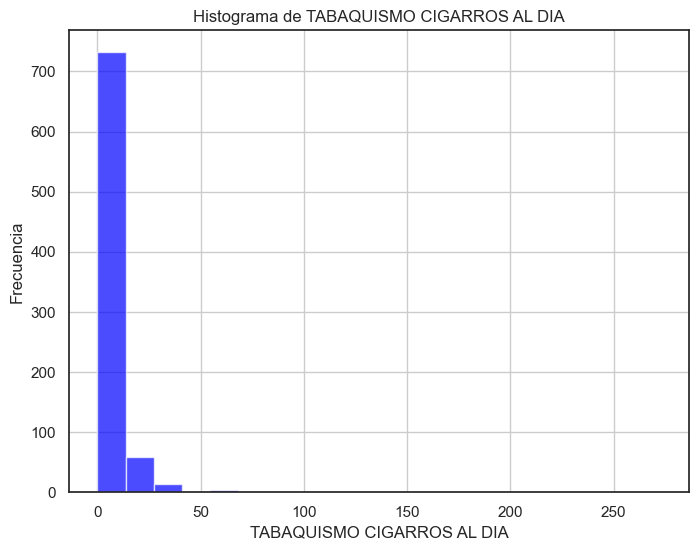

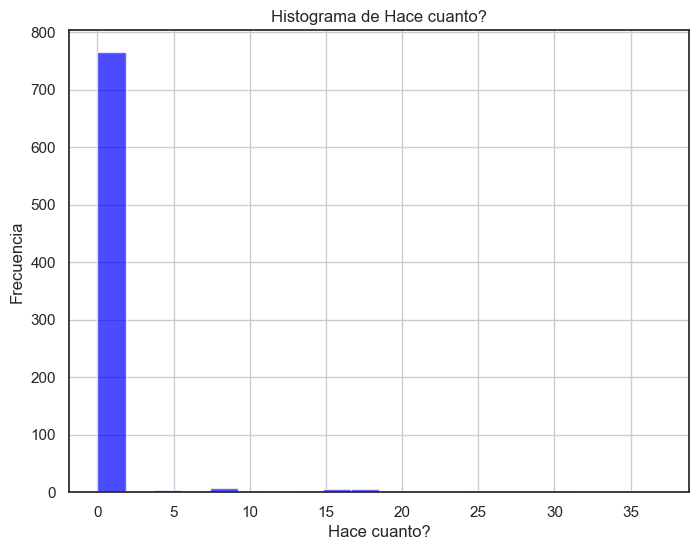

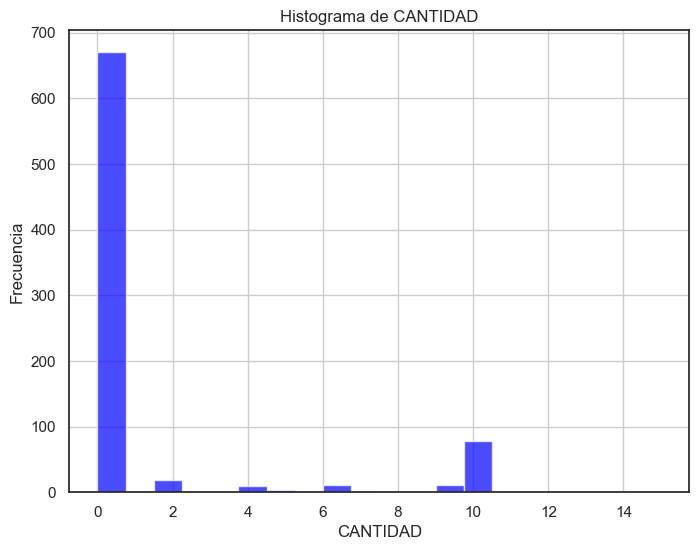

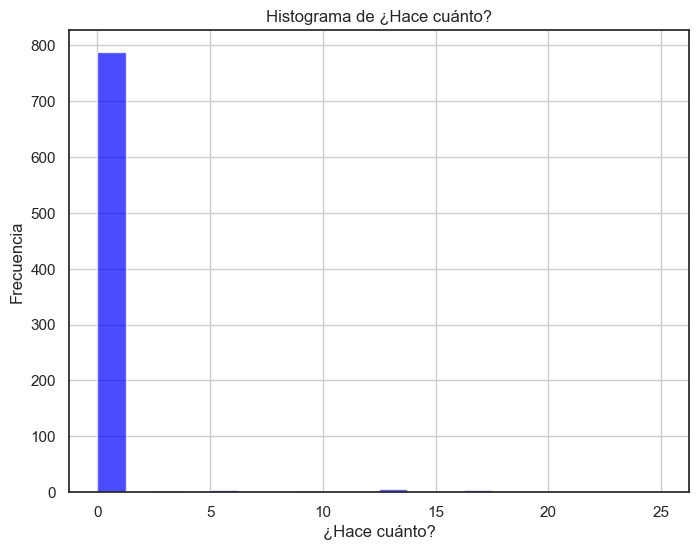

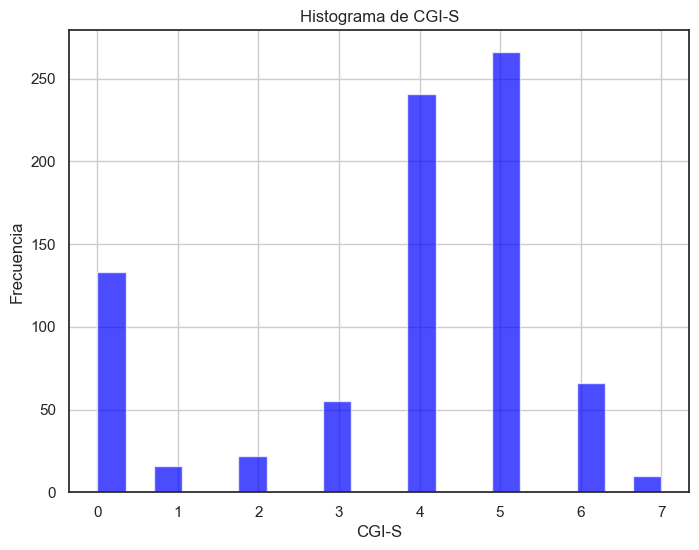

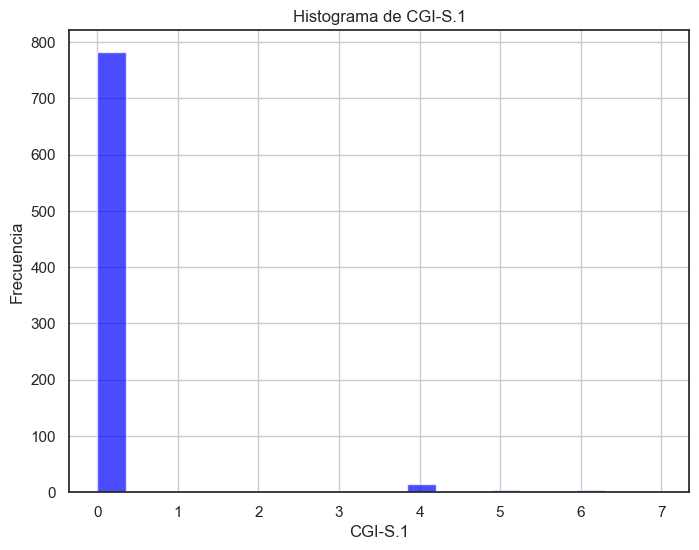

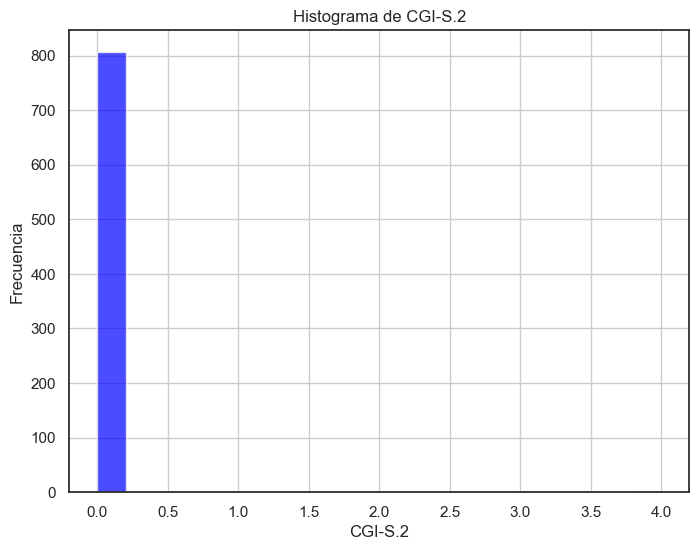

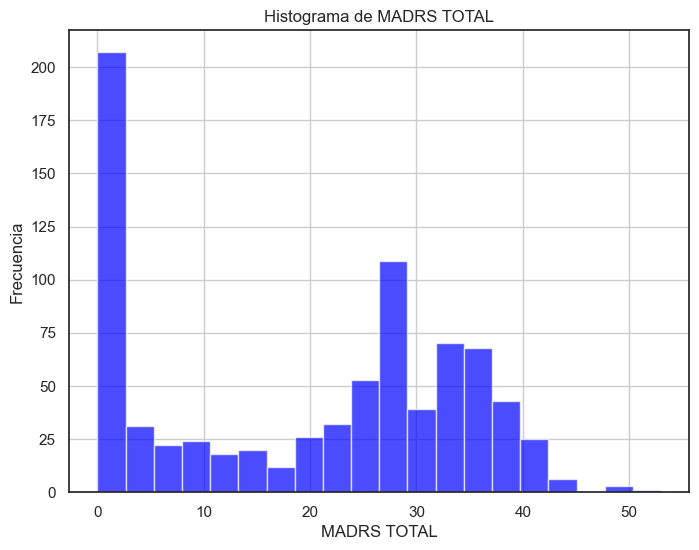

In [222]:
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama datos_proc
columnas_no_binarias = datos_proc[['EDAD', 'NUMERO DE EPISODIOS PREVIOS', 'años_estudio',
                                    'TABAQUISMO CIGARROS AL DIA', 'Hace cuanto?', 'CANTIDAD',
                                    '¿Hace cuánto?', 'CGI-S', 'CGI-S.1', 'CGI-S.2', 'MADRS TOTAL']]

# Crea histogramas para cada columna no binaria
for columna in columnas_no_binarias:
    plt.figure(figsize=(8, 6))
    datos_proc[columna].hist(bins=20, color='blue', alpha=0.7)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()


In [223]:
# Supongamos que tu DataFrame se llama datos_proc
columnas_a_normalizar = ['EDAD', 'NUMERO DE EPISODIOS PREVIOS', 'años_estudio',
                          'TABAQUISMO CIGARROS AL DIA', 'Hace cuanto?', 'CANTIDAD',
                          '¿Hace cuánto?', 'CGI-S', 'CGI-S.1', 'CGI-S.2', 'MADRS TOTAL']

# Selecciona las columnas que deseas normalizar
datos_a_normalizar = datos_proc[columnas_a_normalizar]

# Inicializa el objeto RobustScaler
robust_scaler = RobustScaler()

# Aplica Robust Scaling a las columnas seleccionadas
datos_norm = robust_scaler.fit_transform(datos_a_normalizar)

# Crea un nuevo DataFrame con los datos normalizados
datos_norm_df = pd.DataFrame(datos_norm, columns=columnas_a_normalizar)

# Elimina las columnas originales del DataFrame original
datos_proc = datos_proc.drop(columnas_a_normalizar, axis=1)

# Concatena el DataFrame original con el DataFrame normalizado
datos_proc = pd.concat([datos_proc, datos_norm_df], axis=1)

# Muestra el DataFrame resultante
print(datos_proc)

     TABAQUISMO   AÑOS DE TABAQUSMO  Consumo de alcohol  \
0              0                0.0                   0   
1              0                0.0                   0   
2              0                0.0                   0   
3              1               16.0                   0   
4              0                0.0                   0   
5              0                0.0                   0   
6              0                0.0                   0   
7              1                1.0                   0   
8              0                0.0                   0   
9              0                0.0                   0   
10             0                0.0                   0   
11             0                0.0                   0   
12             0                0.0                   0   
13             0                0.0                   0   
14             0                0.0                   0   
15             0                0.0                   0 

In [224]:
datos_proc.shape

(809, 46)

In [225]:
datos_proc.sample(1)

,TABAQUISMO,AÑOS DE TABAQUSMO,Consumo de alcohol,CAFÉ O TÉ 0. TAZAS AL DIA,A1,A2,A3a,A3b,A3c,A3d,A3e,A3f,A3g,A4b,EDMA,EDMR,C1,C2,C3,C4,C5,C6,hay_c,Puntaje,Diagnostico_Depresión resistente al tratamiento,Diagnostico_Esquizofrenia,Diagnostico_Trastorno Bipolar,F,condicion_dummy,Pareja,catolica,proveedor,cafe,drogas,historia,EDAD,NUMERO DE EPISODIOS PREVIOS,años_estudio,TABAQUISMO CIGARROS AL DIA,Hace cuanto?,CANTIDAD,¿Hace cuánto?,CGI-S,CGI-S.1,CGI-S.2,MADRS TOTAL
1,0,0.0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1.0,7,1,0,0,1,1,1,1,0,1,0,1,-0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.1


## PCA

In [229]:
datos_proc.dtypes

TABAQUISMO                                           int32
AÑOS DE TABAQUSMO                                  float64
Consumo de alcohol                                   int32
CAFÉ O TÉ 0. TAZAS AL DIA                            int64
A1                                                   int64
A2                                                   int64
A3a                                                  int64
A3b                                                  int64
A3c                                                  int64
A3d                                                  int64
A3e                                                  int64
A3f                                                  int64
A3g                                                  int64
A4b                                                  int64
EDMA                                                 int64
EDMR                                                 int64
C1                                                   int

In [232]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd

# Supongamos que tu DataFrame se llama datos_proc
columnas_numericas = datos_proc.select_dtypes(include=['float64', 'int64', 'int32']).columns
datos_numericos = datos_proc[columnas_numericas]

# Manejar los valores nulos (NaN) llenándolos con la media de cada columna
imputer = SimpleImputer(strategy='mean')
datos_numericos_sin_nulos = pd.DataFrame(imputer.fit_transform(datos_numericos), columns=columnas_numericas)

# Normaliza los datos
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(datos_numericos_sin_nulos)

# Inicializa el objeto PCA
pca = PCA()

# Aplica PCA a los datos normalizados
componentes_principales = pca.fit_transform(datos_normalizados)

# Crea un DataFrame con los resultados del PCA
columnas_pca = [f'PC{i+1}' for i in range(componentes_principales.shape[1])]
df_pca = pd.DataFrame(data=componentes_principales, columns=columnas_pca)

# Concatena el DataFrame original con el DataFrame del PCA
datos_proc_pca = pd.concat([datos_proc, df_pca], axis=1)

# Muestra el DataFrame resultante con los componentes principales añadidos
print(datos_proc_pca)


     TABAQUISMO   AÑOS DE TABAQUSMO  Consumo de alcohol  \
0              0                0.0                   0   
1              0                0.0                   0   
2              0                0.0                   0   
3              1               16.0                   0   
4              0                0.0                   0   
5              0                0.0                   0   
6              0                0.0                   0   
7              1                1.0                   0   
8              0                0.0                   0   
9              0                0.0                   0   
10             0                0.0                   0   
11             0                0.0                   0   
12             0                0.0                   0   
13             0                0.0                   0   
14             0                0.0                   0   
15             0                0.0                   0 

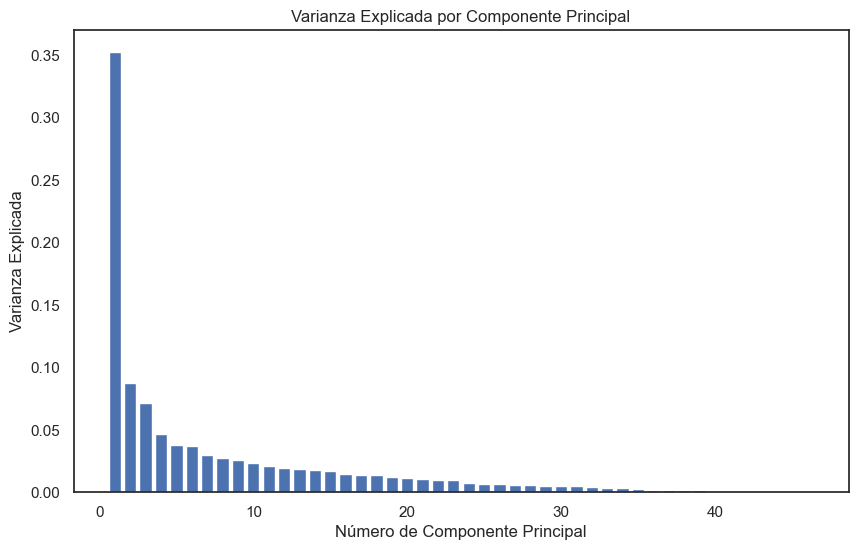

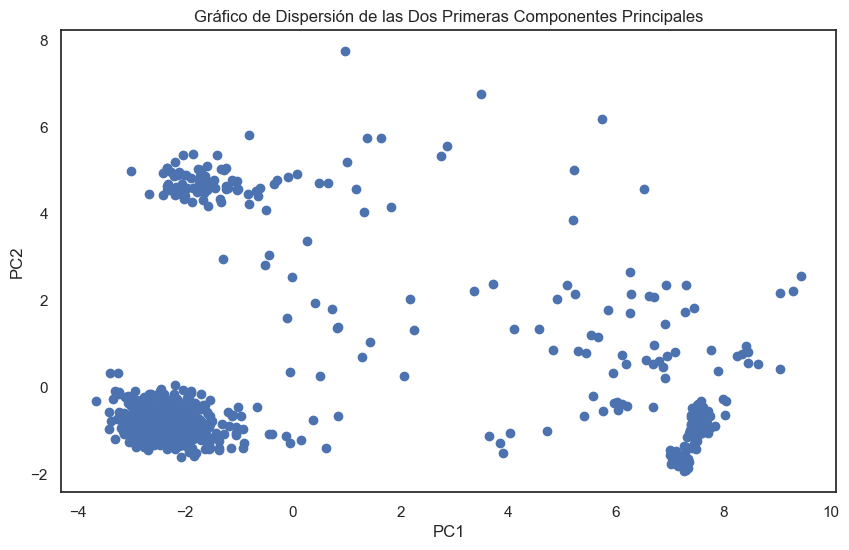

In [233]:
import matplotlib.pyplot as plt

# Visualizar la varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Número de Componente Principal')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.show()

# Visualizar un gráfico de dispersión de las dos primeras componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Gráfico de Dispersión de las Dos Primeras Componentes Principales')
plt.show()


In [234]:
import pandas as pd

# Supongamos que tu DataFrame se llama datos_proc
columnas_numericas = datos_proc.select_dtypes(include=['float64', 'int64', 'int32']).columns
datos_numericos = datos_proc[columnas_numericas]

# Manejar los valores nulos (NaN) llenándolos con la media de cada columna
imputer = SimpleImputer(strategy='mean')
datos_numericos_sin_nulos = pd.DataFrame(imputer.fit_transform(datos_numericos), columns=columnas_numericas)

# Normaliza los datos
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(datos_numericos_sin_nulos)

# Inicializa el objeto PCA
pca = PCA()

# Aplica PCA a los datos normalizados
componentes_principales = pca.fit_transform(datos_normalizados)

# Obtiene los loadings del primer componente principal
loadings = pca.components_[0]

# Crea un DataFrame con los loadings y las columnas originales
loadings_df = pd.DataFrame({'Variable': columnas_numericas, 'Loading': loadings})

# Ordena el DataFrame por los valores absolutos de los loadings
loadings_df = loadings_df.reindex(loadings_df['Loading'].abs().sort_values(ascending=False).index)

# Muestra el DataFrame con los loadings
print(loadings_df)


                                           Variable       Loading
14                                             EDMA -2.457526e-01
5                                                A2 -2.439473e-01
4                                                A1 -2.429425e-01
7                                               A3b -2.399978e-01
24  Diagnostico_Depresión resistente al tratamiento -2.361380e-01
13                                              A4b -2.356385e-01
22                                            hay_c -2.305862e-01
11                                              A3f -2.226210e-01
10                                              A3e -2.177617e-01
15                                             EDMR -2.174373e-01
28                                  condicion_dummy -2.141371e-01
25                        Diagnostico_Esquizofrenia  2.133783e-01
8                                               A3c -2.067772e-01
9                                               A3d -2.061370e-01
42        

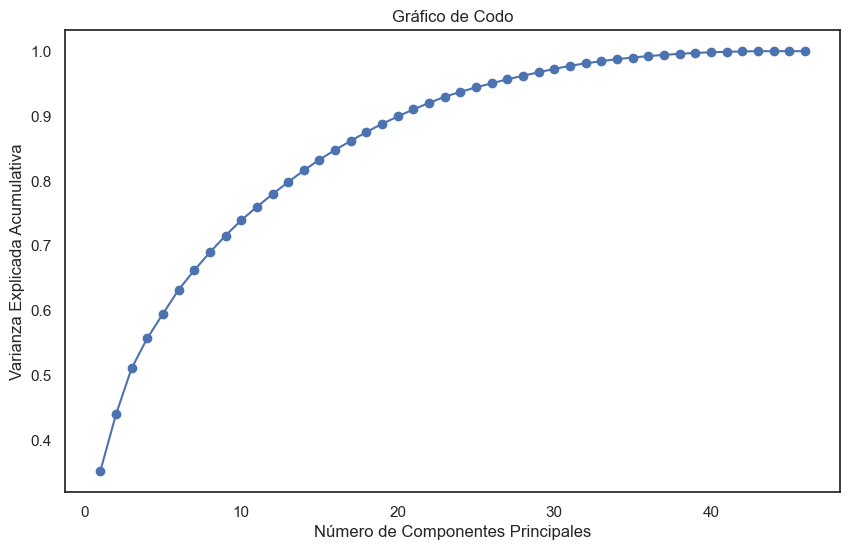

In [235]:
import matplotlib.pyplot as plt

# Supongamos que ya has realizado PCA en tu conjunto de datos y guardado los resultados en la variable pca
# Asegúrate de haber normalizado y manejado los valores nulos antes de realizar PCA

# Explained variance ratio por cada componente principal
explained_var_ratio = pca.explained_variance_ratio_

# Acumulación de la varianza explicada
cumulative_var_ratio = explained_var_ratio.cumsum()

# Número de componentes principales
num_components = len(explained_var_ratio)

# Crear el gráfico de codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_components + 1), cumulative_var_ratio, marker='o', linestyle='-', color='b')
plt.title('Gráfico de Codo')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.show()


### Conclusiones Avance 1

* Revisando el archivo, me he enontrado que de las 76 columnas que posee, solamente 28 tienen menos del 17% de registros nulos, por lo que me parece que se pierde mucha información, esto contando que solo tenemos 810 registros.
* He logrado revisar las estadisticas resumidas
* Hay correlación entre varias variables, sobre todos en las dummies que son practicamente preguntas que se le han hecho a los pacientes de si y no, sin embargo esto se ha binarizado a 1 y 0.
* También hay algunos patrones de ausencias, sobre todo en los últimos registros.
* Como se ha podido observar existen desequilibrio en las clases objetivos la cual sería la columna de puntaje, por lo que voy a revisar con el equipo de trabajo del hospital si se puede categorizar en rangos.
* Al tener muchos problemas de nulos voy a tener una sesión con el equipo del trabajo de el Hospital esta semana para ver que cambios se pueden hacer.

### Conclusiones Avance 12

* En esta semana tuve una reunión con el equipo para la toma de decisiones, y el cambio con algunos nulos que existían.
* He eliminado la columna nombre debido a que solo es un indice y no aporta ninguna carácteristicas de los pacientes.
* El diagnóstico los he realizado en dummys donde se hicieron tres nuevas caracteristicas binarias correspondientes 
a los tres diagnosticos principales en estudios.
* Se han eliminado aproximadamente 10 columnas debido a la falta de información, la cual aportaba ruido y afectaba la
calidad del dataframe en estudio
* Hubo mucha limpieza como eliminar datos por ejemplo "hace 10 años", los he cambiado por un 10.
* Se han realizado varias columnas dummys , por ejemplo, en el caso de el sexo paso de una columna object donde los valores eran F y M, a una sola columna llamada F donde si tiene un 1 es Femenino, esto debido a que esta es la clase mayoritaria.
* Se ha normalizado las columnas no binarias con el metodo Robust Scaling (Normalización Robusta)debido a que este aunque es similar a Z-Score, utiliza la mediana y el rango intercuartílico en lugar de la media y la desviación estándar,siendo útil cuando hay presencia de valores atípicos.
* He utilizado un gráfico de codo y el metodo PCA , para analizar cuales son las variables que tienen mayor poder predictivo y aportan más variación a mi modelo, esto para discriminar otras variables.